# **1. Perkenalan Dataset**


**Nama dataset   : Credit Card Default Dataset
Sumber         : UCI Machine Learning Repository
Target         : default.payment.next.month
Jenis masalah  : Binary Classification**

Penelitian ini berfokus pada kasus gagal bayar pelanggan di Taiwan dan membandingkan akurasi prediksi probability of default (probabilitas gagal bayar) dari enam metode data mining. Dari perspektif manajemen risiko, hasil akurasi prediksi atas estimasi probabilitas gagal bayar lebih bernilai dibandingkan hasil klasifikasi biner—yaitu nasabah yang kredibel atau tidak kredibel. Karena probabilitas gagal bayar yang sebenarnya tidak diketahui, penelitian ini mengusulkan Sorting Smoothing Method yang baru untuk mengestimasi probabilitas gagal bayar yang sesungguhnya. Dengan probabilitas gagal bayar yang sebenarnya sebagai variabel dependen (Y) dan probabilitas gagal bayar hasil prediksi sebagai variabel independen (X), hasil regresi linear sederhana (Y = A + BX) menunjukkan bahwa model peramalan yang dihasilkan oleh artificial neural network memiliki koefisien determinasi tertinggi; intersep regresinya (A) mendekati nol, dan koefisien regresinya (B) mendekati satu. Oleh karena itu, di antara enam teknik data mining tersebut, artificial neural network merupakan satu-satunya metode yang mampu mengestimasi probabilitas gagal bayar yang sebenarnya secara akurat.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [21]:
# 3. Memuat Dataset

df = pd.read_excel(
    "default of credit card clients.xls",
    skiprows=1
)
# Rename target column for consistency
df.rename(
    columns={"default payment next month": "target"},
    inplace=True
)
# Target variable:
# default.payment.next.month
# Binary Classification
# 1 = Default payment
# 0 = Non-default payment
df.rename(
    columns={"default payment next month": "target"},
    inplace=True
)

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [22]:
df.info()
df.describe()
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

,count
target,
0,23364
1,6636


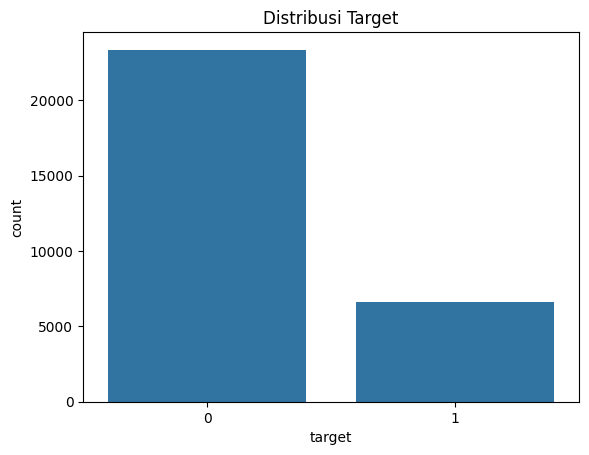

In [23]:
sns.countplot(x='target', data=df)
plt.title("Distribusi Target")
plt.show()

In [24]:
df.isnull().sum()
df = df.drop_duplicates()

In [25]:
df['TOTAL_BILL'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)
df['TOTAL_PAY'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].sum(axis=1)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [26]:
# ===============================
# PREPROCESSING DATASET UTUH
# ===============================
# Target variable (Binary Classification)
# default.payment.next.month
# 1 = Default, 0 = Non-default

target_col = "target"

X = df.drop(columns=[target_col])
y = df[target_col]

# Numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Handle missing values
imputer = SimpleImputer(strategy="median")
X[num_cols] = imputer.fit_transform(X[num_cols])

# Feature scaling
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Save full preprocessed dataset
df_preprocessed = X.copy()
df_preprocessed[target_col] = y.values

output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

df_preprocessed.to_csv(
    f"{output_dir}/creditcard_preprocessed_full.csv",
    index=False
)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.811
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



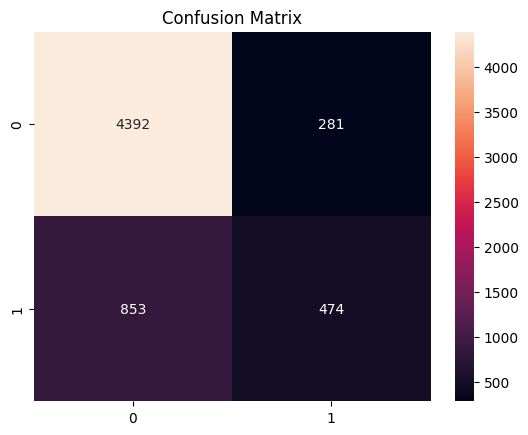

In [29]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [30]:
plt.savefig("training_confusion_matrix.png")
plt.show()


<Figure size 640x480 with 0 Axes>

Model RandomForest menunjukkan performa awal yang cukup baik sebagai baseline dengan akurasi sekitar XX%.
Fitur agregasi seperti TOTAL_BILL dan TOTAL_PAY memberikan kontribusi positif terhadap performa model.